In [1]:
import pandas as pd
import jellyfish
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('E_B_NoisySet')
df=df.drop(df.columns[[0]] , 1)

In [3]:
import jellyfish
#Jaro Distance    
months = ["January", "April", "June", "August", "September", "November"] 
colnames=list(df.columns.values)
for x in colnames:
    if x!='STD_Months':
        col=x
        print(col)
        df[col+'_Jaro'] = ''
        ix = [(row) for row in range(df[col].shape[0])]
        for row in ix:
            print("row: " , row)
            Jaro_best = 0
            best_match = ''
            for month in months:
                s1 = df[col].iat[row]
                print("s1: " , s1 )
                s2 = month        
                print("s2: " , s2)
                Jd = jellyfish.jaro_distance(s1 , s2)
                print("Jaro Distance :" , Jd)
                if Jd >= Jaro_best:
                    Jaro_best = Jd
                    best_match = s2
                df[col+'_Jaro'].iat[row] = best_match
                print('\n')
            print("Best Match: " , best_match)
            print("Jaro_best: " , Jaro_best)        
            print("*******")       

0.1_TypoB
row:  0
s1:  Janary
s2:  January
Jaro Distance : 0.9523809523809524


s1:  Janary
s2:  April
Jaro Distance : 0.45555555555555555


s1:  Janary
s2:  June
Jaro Distance : 0.611111111111111


s1:  Janary
s2:  August
Jaro Distance : 0


s1:  Janary
s2:  September
Jaro Distance : 0


s1:  Janary
s2:  November
Jaro Distance : 0.4305555555555555


Best Match:  January
Jaro_best:  0.9523809523809524
*******
row:  1
s1:  Augut
s2:  January
Jaro Distance : 0.44761904761904764


s1:  Augut
s2:  April
Jaro Distance : 0.4666666666666666


s1:  Augut
s2:  June
Jaro Distance : 0.48333333333333334


s1:  Augut
s2:  August
Jaro Distance : 0.9444444444444445


s1:  Augut
s2:  September
Jaro Distance : 0.43703703703703706


s1:  Augut
s2:  November
Jaro Distance : 0


Best Match:  August
Jaro_best:  0.9444444444444445
*******
row:  2
s1:  Janary
s2:  January
Jaro Distance : 0.9523809523809524


s1:  Janary
s2:  April
Jaro Distance : 0.45555555555555555


s1:  Janary
s2:  June
Jaro Distance : 0.

In [4]:
#Jaro Accuracy
from sklearn.metrics import accuracy_score

NameOfColumns = list(df)
JaroAccuracy = []
for x in NameOfColumns:
    if "Jaro" in x:
        print("Jaro Accuracy : " , accuracy_score(df["STD_Months"] , df[x])) 
        JaroAccuracy.append(accuracy_score(df["STD_Months"] , df[x]))
print(JaroAccuracy)

Jaro Accuracy :  1.0
Jaro Accuracy :  1.0
Jaro Accuracy :  0.983333333333
Jaro Accuracy :  0.866666666667
Jaro Accuracy :  0.766666666667
Jaro Accuracy :  0.708333333333
Jaro Accuracy :  0.433333333333
[1.0, 1.0, 0.98333333333333328, 0.8666666666666667, 0.76666666666666672, 0.70833333333333337, 0.43333333333333335]


In [5]:
import numpy as np
#Creating an empty DataFrame
columns = ['Original']
diff = pd.DataFrame(index=range(0,121) , columns=columns)
diff['Original'] = df['STD_Months']

#Iterate ove the transformed columns 
percentage = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5 , 0.6 , 0.7 ]

for p in percentage:
    """Counting #of wrong transformations"""
    diff['Transformation_' + str(p)] = ''
    c = np.where(df['STD_Months'] != df[ str(p) +'_TypoB_Jaro'])
    
    if len(c[0]) > 0 :    
        for x in np.nditer(c):        
            x = int(x)
            diff['Transformation_' + str(p)].iat[x] = df[ str(p) + '_TypoB_Jaro'].iat[x]
diff

,Original,Transformation_0.1,Transformation_0.2,Transformation_0.3,Transformation_0.4,Transformation_0.5,Transformation_0.6,Transformation_0.7
0,January,,,,,,June,
1,August,,,,,,,
2,January,,,,,,June,
3,November,,,,,,April,April
4,April,,,,,,,
5,April,,,,,,,November
6,June,,,,January,,,November
7,November,,,,,,,
8,January,,,,,,,
9,August,,,,,,April,June


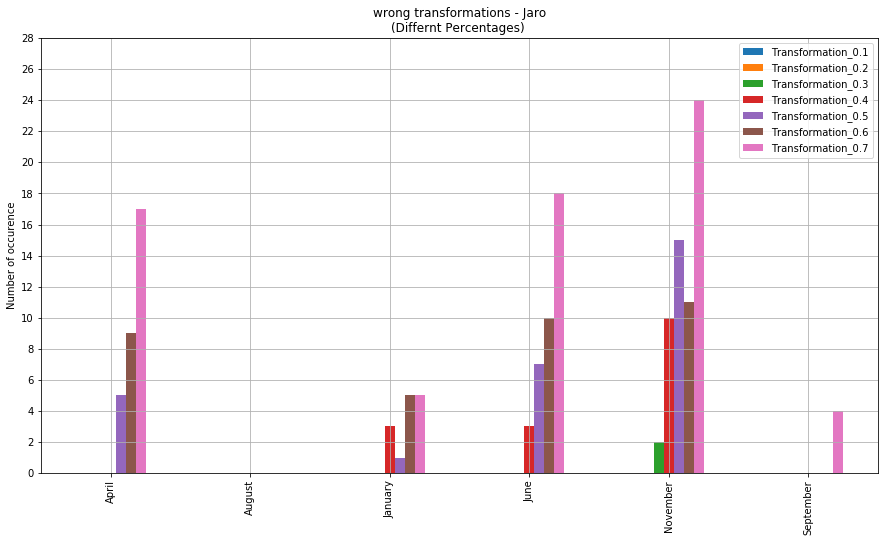

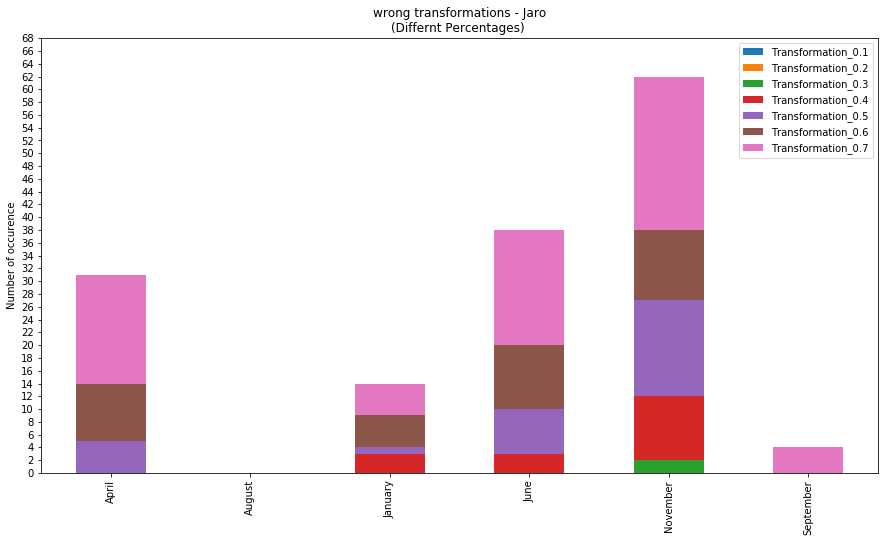

In [6]:
wrong = diff.apply(pd.Series.value_counts)
wrong = wrong.drop(wrong.index[0])
del wrong['Original']
wrong.plot.bar(figsize=(15, 8))
plt.yticks(range(0 , 30 ,2))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Differnt Percentages) ')
plt.grid()
wrong.plot.bar(figsize=(15, 8) ,stacked=True)
plt.yticks(range(0 , 70 ,2))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Differnt Percentages) ')
plt.show()

In [7]:
#Creating an empty DataFrame
columns = ['Original']
Result = pd.DataFrame(index=range(0,500) , columns=columns)
Result['Noisy Form'] = ''
Result['Transfromation'] = ''

per = [0.1 , 0.2 ,0.3 ,  0.4 , 0.5]
#Iterate ove the transformed columns 
for p in per:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoB_Jaro'])
    
    if(len(c[0])>0):
        print(str(p) + '_TypoB')             
        for ind in np.nditer(c):            
            ind = int(ind)
            x = diff['Original'].iloc[ind]
            y = diff['Transformation_' + str(p)].iloc[ind]
            z = df[str(p) + '_TypoB'].iloc[ind]
            Result['Original'].iloc[ind] = x
            Result['Noisy Form'].iloc[ind] = z
            Result['Transfromation'].iloc[ind] = y                   
            print('{} To {}'.format(x , y))
            print('Noisy form:' , z)
            print('\n')
        print('********') 

0.3_TypoB
April To November
Noisy form: ril


April To November
Noisy form: ril


********
0.4_TypoB
June To January
Noisy form: ne


April To November
Noisy form: ril


June To January
Noisy form: ne


April To November
Noisy form: ril


January To June
Noisy form: Jnry


January To June
Noisy form: Juay


September To November
Noisy form: Smber


April To November
Noisy form: ril


June To January
Noisy form: ne


September To November
Noisy form: Semer


September To November
Noisy form: tmber


April To November
Noisy form: ril


April To November
Noisy form: ril


September To November
Noisy form: etber


September To November
Noisy form: Stber


January To June
Noisy form: Jnay


********
0.5_TypoB
January To April
Noisy form: ary


September To November
Noisy form: Sebr


April To November
Noisy form: ri


January To June
Noisy form: uar


January To April
Noisy form: nar


September To November
Noisy form: tebr


April To November
Noisy form: rl


August To June
Noisy form: ust

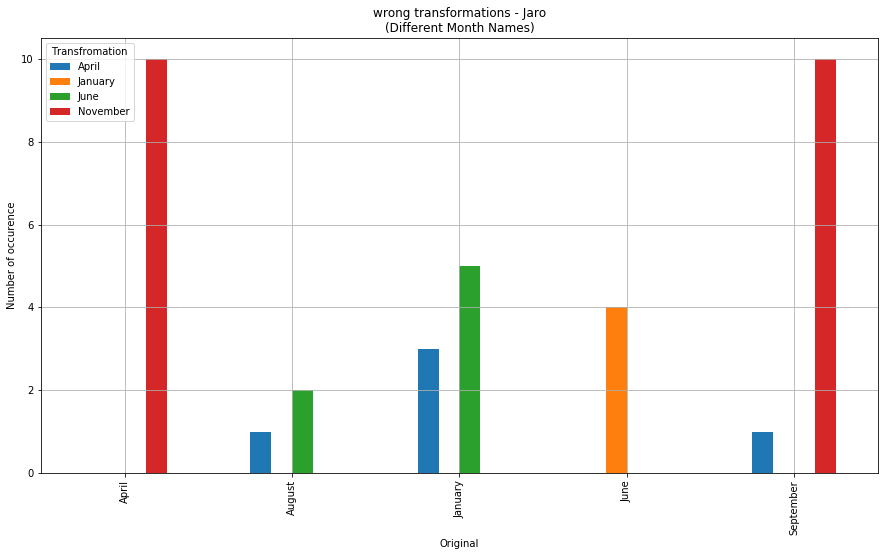

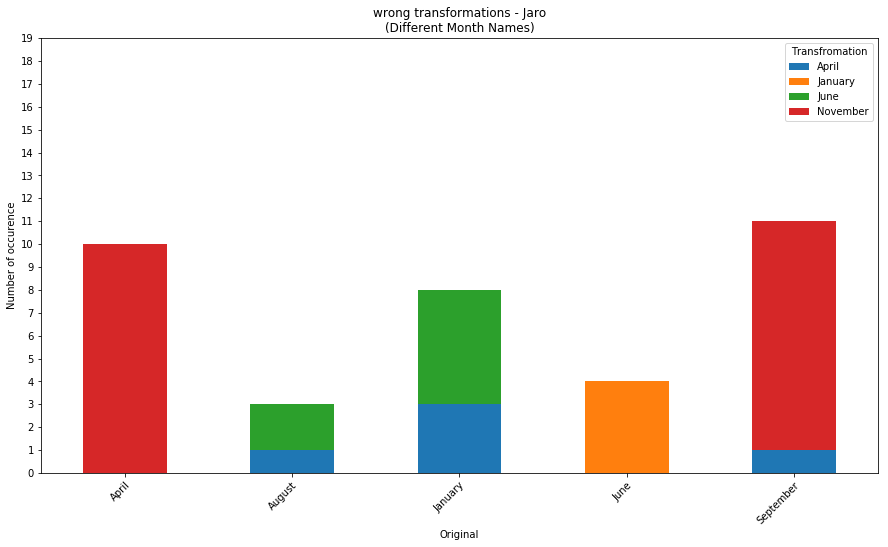

In [8]:
grouped = Result.groupby(['Original' , 'Transfromation'])
new = grouped.size().unstack()
new.plot.bar(figsize=(15, 8))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Different Month Names)')
plt.grid()
new.plot.bar(figsize=(15, 8) ,stacked=True)
plt.xticks(rotation='45', rotation_mode='anchor', ha='right')
plt.yticks(range(0 , 20))
plt.ylabel('Number of occurence')
plt.title('wrong transformations - Jaro\n(Different Month Names)')
plt.show()

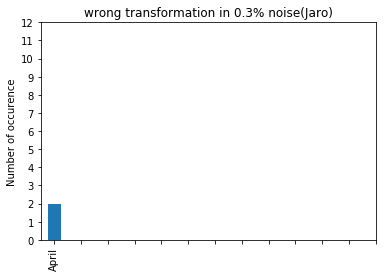

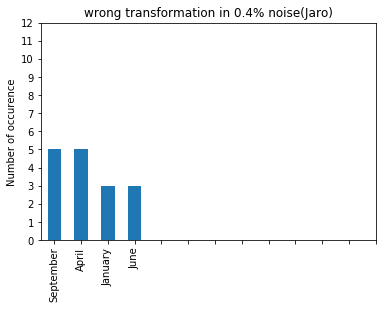

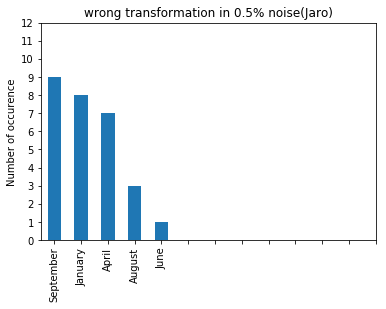

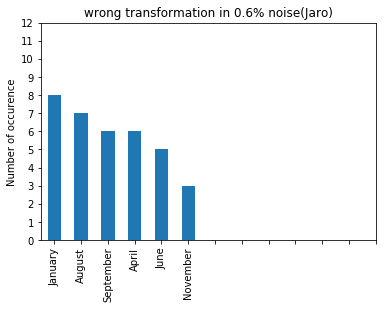

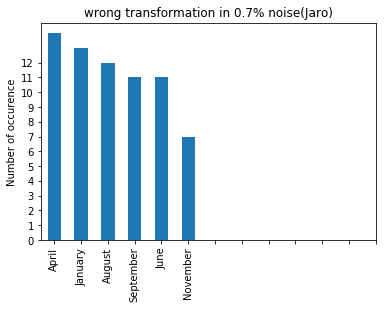

In [9]:
import numpy as np

for p in percentage:
    c = np.where(df['STD_Months'] != df[str(p) +'_TypoB_Jaro'])
    columns = ['Original' , 'Transformation']
    diff = pd.DataFrame(index=range(0,121) , columns=columns)
    diff['Transformation_' + str(p)] = ''
    diff[str(p) + '_TypoB'] = ''
    
    if(len(c[0]>0)):        
        for x in np.nditer(c):
            x = int(x)
            diff['Original'].iat[x] = df['STD_Months'].iat[x]
            diff[str(p) + '_TypoB'].iat[x] = df[str(p) + '_TypoB'].iat[x]
            diff['Transformation'].iat[x] = df[str(p) + '_TypoB_Jaro'].iat[x]
        diff.dropna()
        wrongTransform = diff['Original'].value_counts()
        wrongTransform.plot.bar()
        plt.yticks(range(0 , 13))
        plt.ylabel('Number of occurence')
        plt.title('wrong transformation in {}% noise(Jaro)'.format(p))
        plt.xticks(range(0,13))
        plt.show() 